<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Univariate-Normal-Distribution" data-toc-modified-id="-Univariate-Normal-Distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font face="gotham" color="purple"> Univariate Normal Distribution</font></a></span></li><li><span><a href="#-Multivariate-Normal-Distribution-(MND)" data-toc-modified-id="-Multivariate-Normal-Distribution-(MND)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font face="gotham" color="purple"> Multivariate Normal Distribution (MND)</font></a></span><ul class="toc-item"><li><span><a href="#-Expectation-and-Covariance-Matrix" data-toc-modified-id="-Expectation-and-Covariance-Matrix-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><font face="gotham" color="purple"> Expectation and Covariance Matrix</font></a></span></li><li><span><a href="#-Linear-Combination-of-Normal-Distribution" data-toc-modified-id="-Linear-Combination-of-Normal-Distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><font face="gotham" color="purple"> Linear Combination of Normal Distribution</font></a></span></li><li><span><a href="#-Inverse-and-Positive-Definite" data-toc-modified-id="-Inverse-and-Positive-Definite-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><font face="gotham" color="purple"> Inverse and Positive Definite</font></a></span></li><li><span><a href="#-Inverse-and-Symmetry" data-toc-modified-id="-Inverse-and-Symmetry-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><font face="gotham" color="purple"> Inverse and Symmetry</font></a></span></li><li><span><a href="#-Bivariate-Normal-Distribution" data-toc-modified-id="-Bivariate-Normal-Distribution-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><font face="gotham" color="purple"> Bivariate Normal Distribution</font></a></span></li><li><span><a href="#-Covariance-Matrix" data-toc-modified-id="-Covariance-Matrix-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><font face="gotham" color="purple"> Covariance Matrix</font></a></span></li><li><span><a href="#-Isocontours" data-toc-modified-id="-Isocontours-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span><font face="gotham" color="purple"> Isocontours</font></a></span></li><li><span><a href="#-Covariance-Matrix-with-Nonezero-Covariance" data-toc-modified-id="-Covariance-Matrix-with-Nonezero-Covariance-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span><font face="gotham" color="purple"> Covariance Matrix with Nonezero Covariance</font></a></span></li></ul></li><li><span><a href="#-Quadratic-Form-of-Normal-Distribution" data-toc-modified-id="-Quadratic-Form-of-Normal-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font face="gotham" color="purple"> Quadratic Form of Normal Distribution</font></a></span></li></ul></div>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [21]:
import warnings
warnings.filterwarnings("ignore")

This is arguably one of the most significant applications of linear algebra. We will gradually build up intuition before delving into the multivariate normal distribution.

# <font face="gotham" color="purple"> Univariate Normal Distribution

The probability density function (PDF) of the univariate normal distribution is defined as:

$$
p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma}\exp{\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)}
$$

Here, $p(x; \mu, \sigma^2)$ denotes the PDF where the random variable is $x$, and the parameters are mean $\mu$ and variance $\sigma^2$. The notation is not indicative of a conditional relationship, which is typically represented as $p(x|y)$.

It's important to note that the expression $-\frac{1}{2\sigma^2}(x-\mu)^2$ represents a quadratic function. This is essentially the univariate counterpart of the quadratic forms discussed in previous chapters.

If we define $\sigma = 2$, $\mu = 1$, let's plot the quadratic function and its exponential.

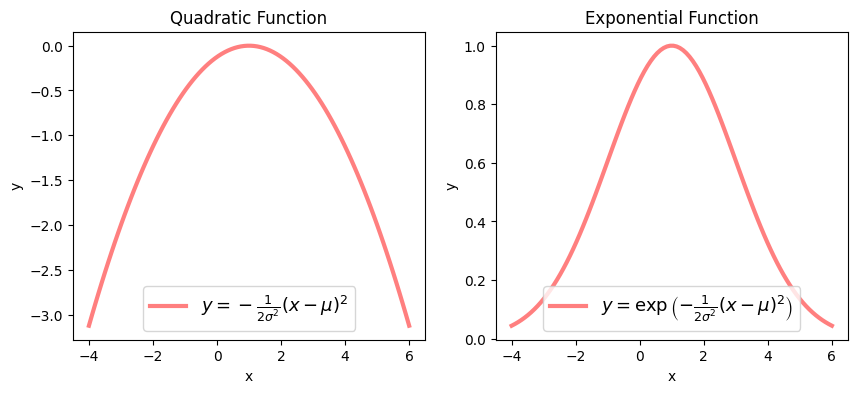

In [22]:

# Parameters
sigma = 2
mu = 1

# Generate x values
x = np.linspace(-4, 6, 100)  # Increased number of points for smoother curve

# Calculate y values for both plots
y_quadratic = -1/(2*sigma**2) * (x - mu)**2
y_exponential = np.exp(y_quadratic)

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot quadratic function
axs[0].plot(x, y_quadratic, lw=3, color='red', alpha=0.5, label=r'$y = -\frac{1}{2\sigma^2}(x - \mu)^2$')
axs[0].legend(loc='best', fontsize=13)
axs[0].set_title('Quadratic Function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Plot exponential function
axs[1].plot(x, y_exponential, lw=3, color='red', alpha=0.5, label=r'$y = \exp\left(-\frac{1}{2\sigma^2}(x - \mu)^2\right)$')
axs[1].legend(loc='best', fontsize=13)
axs[1].set_title('Exponential Function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Display the plot
plt.show()


The constant $\frac{1}{\sqrt{2\pi}\sigma}$ at the beginning serves as a normalizing factor, ensuring that the integral of the entire function equals $1$:

$$
\int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi} \sigma}\exp \left(-\frac{1}{2 \sigma^{2}}(x-\mu)^{2}\right)dx=1
$$

The simplest method to plot a univariate normal PDF is by utilizing the `sp.stats.norm.pdf()` function from Scipy, where we can directly input the values for $\mu$ and $\sigma$.

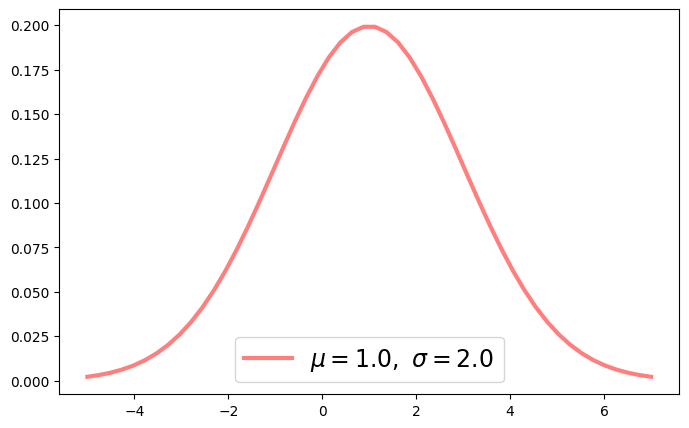

In [23]:
x = np.linspace(-5, 7)
mu = 1
sigma = 2

y = sp.stats.norm.pdf(x, loc = mu, scale = sigma)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, y, lw = 3, color = 'r', alpha = .5, 
        label = r'$\mu = %.1f,\  \sigma = %.1f$'%(mu, sigma))
ax.legend(loc ='best', fontsize= 17)
plt.show()

# <font face="gotham" color="purple"> Multivariate Normal Distribution (MND)

The probability density function (PDF) of a multivariate normal distribution is given by:

$$
p(\mathbf{x} ; \mu, \Sigma) = \frac{1}{(2 \pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}} \exp \left(-\frac{1}{2}(\mathbf{x}-\mu)^{T} \Sigma^{-1}(\mathbf{x}-\mu)\right)
$$

Understanding this PDF requires refreshing some foundational knowledge of random vectors, which will be done below.

## <font face="gotham" color="purple"> Expectation and Covariance Matrix

Consider a random $n$-vector $\mathbf{x}$, its expection is defined as

$$
E(\mathbf{x}) = 
\left[
\begin{matrix}
E(x_1)\\E(x_2)\\ \vdots \\E(x_n)
\end{matrix}
\right]
$$

The variance of $\mathbf{x}$ is a covariance matrix, denoted as

$$
\begin{aligned}
\Sigma_{\mathbf{x} \mathbf{x}}=\operatorname{Var}(\mathbf{x}) &=E\left[(\mathbf{x}-\mu)(\mathbf{x}-\mu)^T\right]\\
&=\left[\begin{array}{cccc}
\operatorname{Var}\left(x_{1}\right) & \operatorname{Cov}\left(x_{1}, x_{2}\right) & \dots & \operatorname{Cov}\left(x_{1}, x_{n}\right) \\
\operatorname{Cov}\left(x_{2}, x_{1}\right) & \operatorname{Var}\left(x_{2}\right) & \dots & \operatorname{Cov}\left(x_{2}, x_{n}\right) \\
\vdots & \vdots & \ddots & \vdots \\
\operatorname{Cov}\left(x_{n}, x_{1}\right) & \operatorname{Cov}\left(x_{n}, x_{2}\right) & \dots & \operatorname{Var}\left(x_{n}\right)
\end{array}\right]
\end{aligned}
$$

## <font face="gotham" color="purple"> Linear Combination of Normal Distribution

As anticipated, the linear combination of a sequence of normally distributed variables will also yield a normal distribution. Consider a random vector $\mathbf{z}$:

$$
\mathbf{z}=
\left[
\begin{matrix}
z_1\\
z_2\\
\vdots \\
z_n
\end{matrix}
\right]
$$

where each $z_i$ is independently and identically distributed (iid) with mean $0$ and variance $\sigma^2=1$. Given any full-rank matrix $A_{n\times n}$, a random normal vector $\mathbf{x}$ can be expressed as:

$$
\mathbf{x} = A\mathbf{z}
$$

This implies that each $x_i$ for $i=1,2,...,n$ is a linear combination of $\mathbf{z}$. If $\mathbf{\mu} = \mathbf{0}$, the variance of $\mathbf{x}$ is given by:

$$
\operatorname{Var}(\mathbf{x})=E\left(\mathbf{x} \mathbf{x}^{T}\right)=A E\left(\mathbf{z} \mathbf{z}^{T}\right) A^{T}=A \mathbf{I} A^{T}=A A^{T}
$$

The covariance matrix $AA^T$ is a positive semi-definite matrix. For an $n$-vector $\mathbf{x}$, we have:

$$
\mathbf{x}^TAA^T\mathbf{x}= (A^T\mathbf{x})^T(A^T\mathbf{x}) = \|A^T\mathbf{x}\|^2 \geq 0
$$

This also indicates that all eigenvalues of $AA^T$ are non-negative. For further details, refer to Chapter 17, specifically the section on positive definite matrices.

## <font face="gotham" color="purple"> Inverse and Positive Definite

If a matrix $A_{n\times n}$ is both positive definite and symmetric, all its eigenvalues are strictly greater than $0$. This property is crucial because eigenvalues reflect the matrix's characteristics in various dimensions. However, encountering an eigenvalue of $0$ implies a significant shift:

$$
A\mathbf{x} = 0
$$

This equation suggests that $\mathbf{x}$, a nontrivial solution (eigenvector), leads to a scenario where the matrix $A$ transforms $\mathbf{x}$ into the zero vector. A nontrivial solution implies that the eigenvector $\mathbf{x}$ is not the zero vector, which in turn indicates that the matrix $A$ lacks full rank and is therefore non-invertible.

Consequently, the presence of a $0$ eigenvalue in a positive definite and symmetric matrix contradicts its defined properties. Thus, if $A$ is indeed positive definite, it guarantees that all eigenvalues are positive, ensuring that $A$ is invertible. This invertibility is a key attribute, as it confirms the matrix's capability to be uniquely reversed, maintaining the integrity of operations within linear transformations.

## <font face="gotham" color="purple"> Inverse and Symmetry

Continuing from the previous section, where $A$ is symmetric and positive semi-definite (PSD), we know that $AA^{-1} = \mathbf{I}$. By taking the transpose of this equation, we obtain:

$$
(A^{-1})^T A = (A^T)^{-1} A = A^{-1} A = \mathbf{I}
$$

This demonstrates that $(A^{-1})^T = A^{-1}$, indicating that $A^{-1}$ is also a symmetric matrix. Next, we aim to show that $A^{-1}$ is positive definite.

Consider an eigenvalue equation for $A$:

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

Applying $A^{-1}$ to both sides, we get:

$$
A^{-1} A \mathbf{v} = \lambda A^{-1} \mathbf{v} \Longrightarrow \frac{1}{\lambda} \mathbf{v} = A^{-1}\mathbf{v}
$$

This derivation proves that if $A$ has an eigenvalue $\lambda$, then $A^{-1}$ has $\frac{1}{\lambda}$ as its corresponding eigenvalue.

Given that $\lambda > 0$ (since $A$ is positive definite), it follows that $\frac{1}{\lambda} > 0$. Therefore, $A^{-1}$ is also positive definite, maintaining the property of positive definiteness through inversion.

## <font face="gotham" color="purple"> Bivariate Normal Distribution

In the PDF of MND, the argument of exponential function is $-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T} \Sigma^{-1}(\mathbf{x}-\mathbf\mu)$, which takes a quadratic form. 

$\Sigma$ is symmetric positive semi-definite, so is $\Sigma^{-1}$ for any vector $\mathbf{x} = \mathbf{\mu}$. 

With a minus sign in front, we get negative semi-definite quadratic form

$$
-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}( \mathbf{x}-{\mu})\leq 0
$$
If we define a simple bivariate case, the quadratic form is 

\begin{align}
-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{cc}
\sigma_{1}^{2} & 0 \\
0 & \sigma_{2}^{2}
\end{array}\right]^{-1}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]&=
-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{cc}
\frac{1}{\sigma_{1}^{2}} & 0 \\
0 & \frac{1}{\sigma_{2}^{2}}
\end{array}\right]\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]\\
&=-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{l}
\frac{1}{\sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right) \\
\frac{1}{\sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)
\end{array}\right]\\
& = -\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}
\end{align}
Further, we give value to $\sigma$ and $\mu$

$$
\sigma_1 = 2,\  \sigma_2 = 3,\  \mu_1 = 0,\  \mu_2 = 0
$$
We can visualize quadratic form and its exponential

In the probability density function (PDF) of the Multivariate Normal Distribution (MND), the argument of the exponential function is $-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T} \Sigma^{-1}(\mathbf{x}-\mathbf{\mu})$, representing a quadratic form. Here, $\Sigma$ denotes the covariance matrix, which is symmetric and positive semi-definite. Consequently, its inverse, $\Sigma^{-1}$, shares these properties for any vector $\mathbf{x} = \mathbf{\mu}$.

The presence of a negative sign results in a negative semi-definite quadratic form, mathematically expressed as:

$$
-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu}) \leq 0
$$

To illustrate this concept with a simple bivariate example, consider the quadratic form:

\begin{align}
-\frac{1}{2}\begin{bmatrix}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{bmatrix}^T\begin{bmatrix}
\sigma_{1}^{2} & 0 \\
0 & \sigma_{2}^{2}
\end{bmatrix}^{-1}\begin{bmatrix}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{bmatrix} &= -\frac{1}{2}\begin{bmatrix}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{bmatrix}^T\begin{bmatrix}
\frac{1}{\sigma_{1}^{2}} & 0 \\
0 & \frac{1}{\sigma_{2}^{2}}
\end{bmatrix}\begin{bmatrix}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{bmatrix} \\
&= -\frac{1}{2}\left(\frac{(x_{1}-\mu_{1})^2}{\sigma_{1}^{2}} + \frac{(x_{2}-\mu_{2})^2}{\sigma_{2}^{2}}\right)
\end{align}

For specific values of $\sigma$ and $\mu$:

$$
\sigma_1 = 2, \sigma_2 = 3, \mu_1 = 0, \mu_2 = 0
$$

This setup allows us to visualize the quadratic form and its exponential, providing insight into the shape and behavior of the Multivariate Normal Distribution's density function.

In [24]:
%matplotlib notebook
x1, x2 = np.linspace(-10, 10, 30), np.linspace(-10, 10, 30)
X1, X2 = np.meshgrid(x1, x2)

sigma1 = 2
sigma2 = 3
mu1, mu2 = 0, 0 

Z = -1/(2*sigma1**2)*(X1 - mu1)**2 - 1/(2*sigma2**2)*(X2 - mu2)**2

fig, axs = plt.subplots(figsize = (8, 4))
axs = fig.add_subplot(121, projection='3d')
axs.plot_surface(X1,X2,Z,cmap='coolwarm')
axs.set_title(r'$-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}$')
cset = axs.contour(X1, X2, Z, zdir='z', offset=-17.5, cmap='coolwarm') 
cset = axs.contour(X1, X2, Z, zdir='x', offset=-10, cmap='coolwarm') 
cset = axs.contour(X1, X2, Z, zdir='y', offset=10, cmap='coolwarm') 

expZ = np.exp(Z)
axs = fig.add_subplot(122, projection='3d')
axs.plot_surface(X1,X2,expZ,cmap='coolwarm')
axs.set_title(r'$\exp{\left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)}$')

plt.show()

<IPython.core.display.Javascript object>

Also, the most convenient way of producing bivariate normal distribution is to use Scipy multivariate normal distribution function.

In [25]:
%matplotlib notebook
mu_1 = 0
sigma_1 = 2

mu_2 = 0
sigma_2 = 3

#Create grid and multivariate normal
x = np.linspace(-5,5,30)
y = np.linspace(-5,5,30)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y 
norm = sp.stats.multivariate_normal([mu_1, mu_2], [[sigma_1, 0], [0, sigma_2]]) # frozen 

#Make a 3D plot
fig = plt.figure(figsize = (8, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, norm.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_title('Bivariate Normal Distribution, $\sigma_1 = 2$, $\sigma_2 = 3$, $\mu_1 = 0$, $\mu_2 = 0$')

plt.show()

<IPython.core.display.Javascript object>

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

Since we have expanded the bivariate quadratic form, back to the MVN PDF $\eqref{1}$, we have


\begin{aligned}
 p(\mathbf{x};\mathbf{\mu}, \Sigma)
&=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)\\
&=\frac{1}{\sqrt{2 \pi} \sigma_{1}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}\right) \cdot \frac{1}{\sqrt{2 \pi} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)
\end{aligned}


We find that bivariate normal distribution can be decomposed into <font face="gotham" color="red"> a product of two single variate normal distribution</font>!

## <font face="gotham" color="purple"> Covariance Matrix

Covariance matrix is the most important factor that shapes the distribution. Use Scipy multivariate normal random generator, we can learn some intuition of the covariance matrix.

<IPython.core.display.Javascript object>


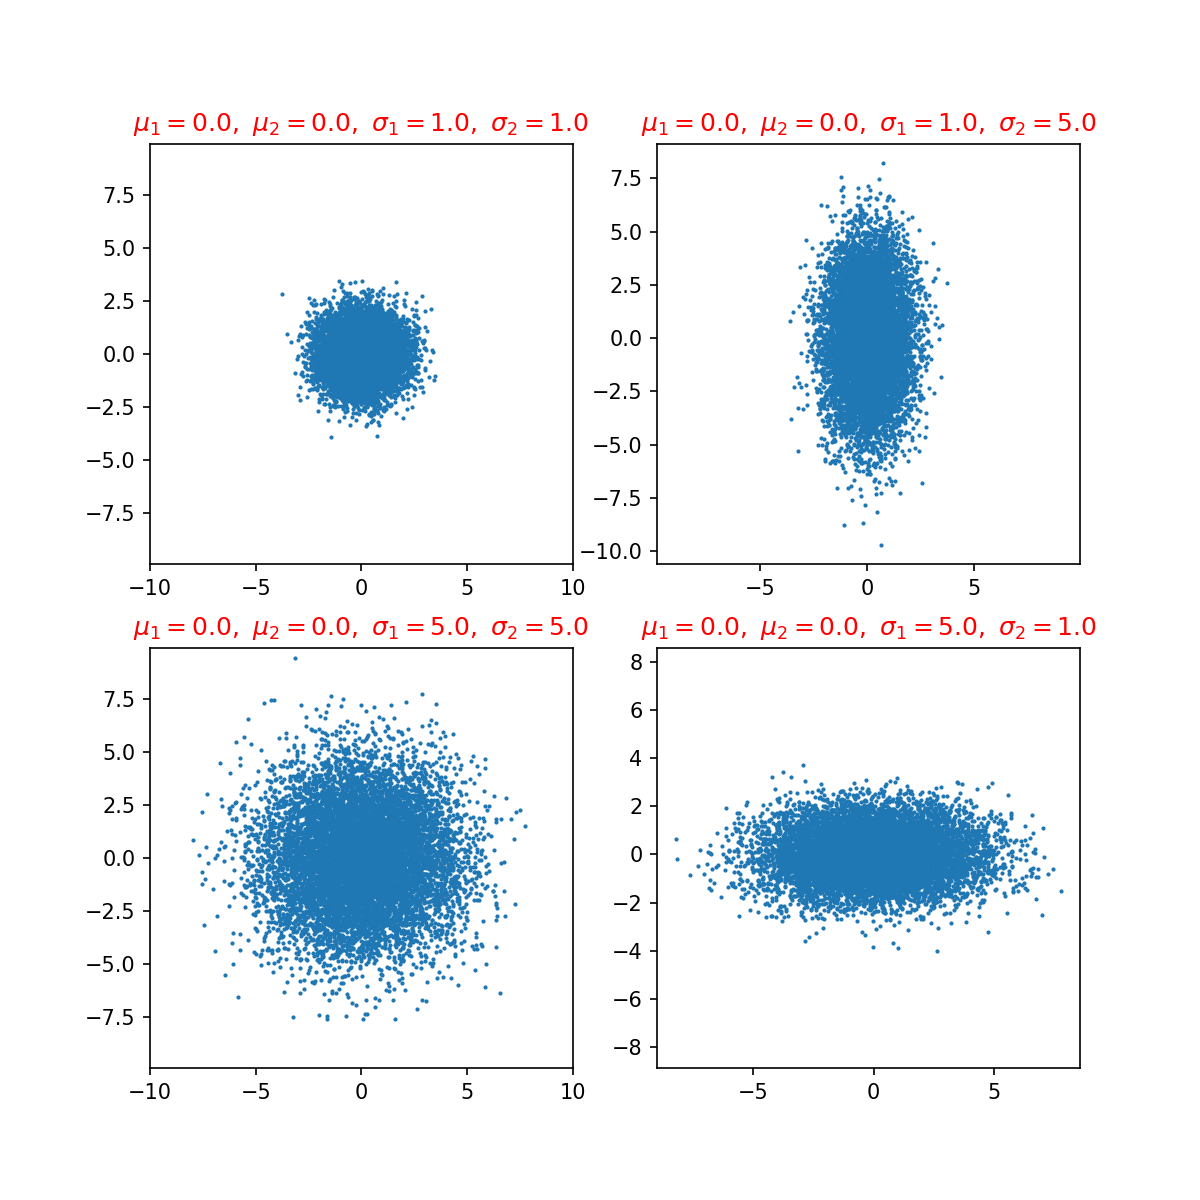

In [ ]:
fig = plt.figure(figsize = (8, 8))
fig.suptitle('Bivariate Normal Randome Draw, $\rho_{12}=\rho_{21}=0$')
########
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(221)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_title(string, color = 'red')
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(222)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 5, 5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(223)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(224)
ax.scatter(X[:,0], X[:,1], s = 1)
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
ax.axis('equal')


plt.show()

Notice that the plot above all take a diagonal covariance matrix, i.e. $\rho_{12} = \rho_{21} =0$

$$
\left[
\begin{matrix}
\sigma_1^2 & 0\\
0 & \sigma_2^2
\end{matrix}
\right]
$$

To understand the covariance matrix beyond the intuition, we need to analyze eigenvectors and -values. But we know that diagonal matrix has all of its eigenvalues on the principal diagonal, which are $\sigma_1^2$ and $\sigma_2^2$.

## <font face="gotham" color="purple"> Isocontours

Isocontours are simply contour lines. They are projections of the variable $z$ of iso height onto $xy$-plane. Let's show what they look like analytically. 

We know eigenvalues, intuitively we also feel that eigenvalues are connected with the shape of isocontours which is demonstrated by the scatter plot above.

We will derive an equation for isocontour.

We saw in previous section, that

$$
p(x ; \mu, \Sigma)=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)
$$

In order to get the equation of a contour, we set $p(x ; \mu, \Sigma) = c$

$$
\begin{aligned}
c &=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right) \\
2 \pi c \sigma_{1} \sigma_{2} &=\exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right) \\
\log \left(2 \pi c \sigma_{1} \sigma_{2}\right) &=-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2} \\
\log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right) &=\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}+\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2} \\
1 &=\frac{\left(x_{1}-\mu_{1}\right)^{2}}{2 \sigma_{1}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}+\frac{\left(x_{2}-\mu_{2}\right)^{2}}{2 \sigma_{2}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}
\end{aligned}
$$

Defining

$$
a=\sqrt{2 \sigma_{1}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)} \\
b=\sqrt{2 \sigma_{2}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}
$$

it follows that

$$
\left(\frac{x_{1}-\mu_{1}}{a}\right)^{2}+\left(\frac{x_{2}-\mu_{2}}{b}\right)^{2}=1
$$

This is the equation of ellipse, $a$ are $b$ are major/minor semi radii.

The equation can be written as

$$
x_2 = b\sqrt{1-\left(\frac{x_1-\mu}{a}\right)^2}+\mu
$$

However this becomes a function, only valid for ploting half of the ellipse. There are problems while dealing with square root.

Also note that 

$$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$$

which means the singular values of the covariance matrix determines the shape of distribution. This expression also explaines why we are using $\sigma$ to represent singular values, because it is essentially standard deviation.

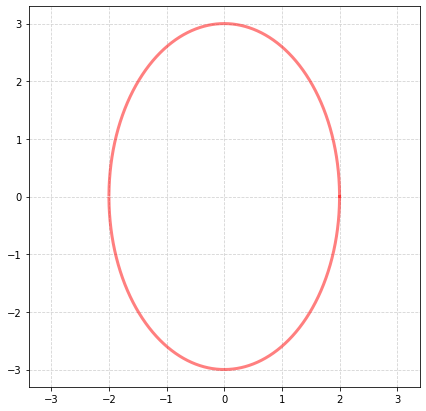

In [ ]:
mu1 = 0    
mu2 = 0   

a= 2    #radius on the x1-axis
b= 3     #radius on the x2-axis

x1 = np.arange(-5, 5, .0001)
fig, ax = plt.subplots(figsize = (7, 7))
x2 = b*np.sqrt(1 - ((x1-mu1)/a)**2) + mu2
minus_x2 = - b*np.sqrt(1 - ((x1-mu1)/a)**2) + mu2
ax.plot(x1 , x2, color = 'r', lw = 3, alpha = .5)
ax.plot(x1 , -x2, color = 'r', lw = 3, alpha = .5)
ax.grid(color='lightgray',linestyle='--')
ax.axis('equal')
plt.show()

Obviously, not the best tool for plotting ellipse, we have another tool - <font face="gotham" color="red">parametric function</font> - specially designed for graphs which can't be conveniently plotted by function.

$$
x = a \cos{(t)}\\
y = b \sin{(t)}
$$

where $t \in (0,\  2\pi]$.

Then let's plot both the ellipse and random draws of corresponding bivariate normal distribution.

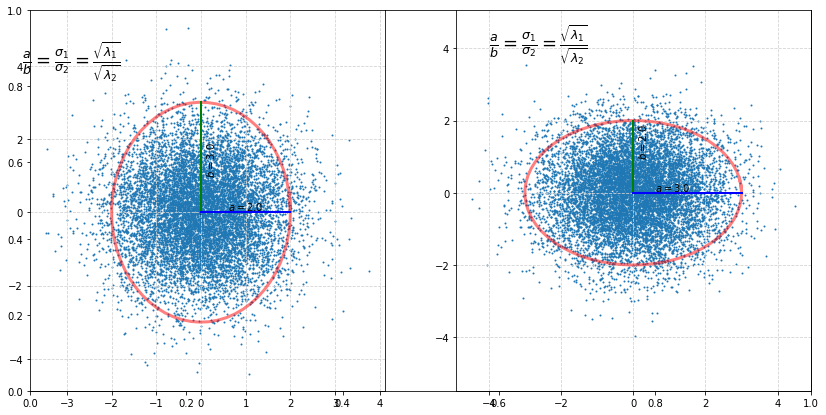

In [ ]:
t = np.arange(0, 2.1*np.pi, .1) # set 2.1*pi to close the ellipse
a = 2 
b = 3

x = a * np.cos(t)
y = b * np.sin(t)
######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)
axs.plot(x, y, color = 'r', lw = 3, alpha = .5)
axs.scatter(0, 0, s = 20, color = 'k')
axs.plot([0, 0], [0, 3], lw = 2, color = 'g')
axs.plot([0, 2], [0, 0], lw = 2, color = 'b')

string = r'$a = %.1f$'%a
axs.text(x = .6, y = 0.05, s = string)
string = r'$b = %.1f$'%b
axs.text(x = 0.1, y = 1, s = string, rotation = 90)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
# ax.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)
a = 3 
b = 2

x = a * np.cos(t)
y = b * np.sin(t)
axs.plot(x, y, color = 'r', lw = 3, alpha = .5)
axs.scatter(0, 0, s = 20, color = 'k')
axs.plot([0, 0], [0, 2], lw = 2, color = 'g')
axs.plot([0, 3], [0, 0], lw = 2, color = 'b')

string = r'$a = %.1f$'%a
axs.text(x = .6, y = 0.05, s = string)
string = r'$b = %.1f$'%b
axs.text(x = 0.1, y = 1, s = string, rotation = 90)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

Here is a side note, that some people might prefer using heatmap for distribution.

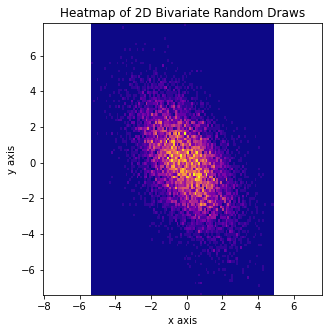

In [ ]:
fig, axs = plt.subplots(figsize = (5, 5))
N_numbers = 1000
N_bins = 100
k = 10000

mu1, mu2 = 0, 0
sigma1, sigma2 = 2, 4
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, -1.5], [-1.5, sigma2]])

mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)           
axs.hist2d(X[:,0], X[:,1], bins=N_bins, density=False, cmap='plasma')

axs.set_title('Heatmap of 2D Bivariate Random Draws')
axs.set_xlabel('x axis')
axs.set_ylabel('y axis')
axs.axis('equal')
plt.show()

## <font face="gotham" color="purple"> Covariance Matrix with Nonezero Covariance

We have mostly seen the case that covariance matrices are diagonal, how about they are just symmetric but not diagonal?

$$
\Sigma =
\left[
\begin{matrix}
1 & -1.2\\
-1.2 & 1.5
\end{matrix}
\right]
$$

Let's take a look the graph.

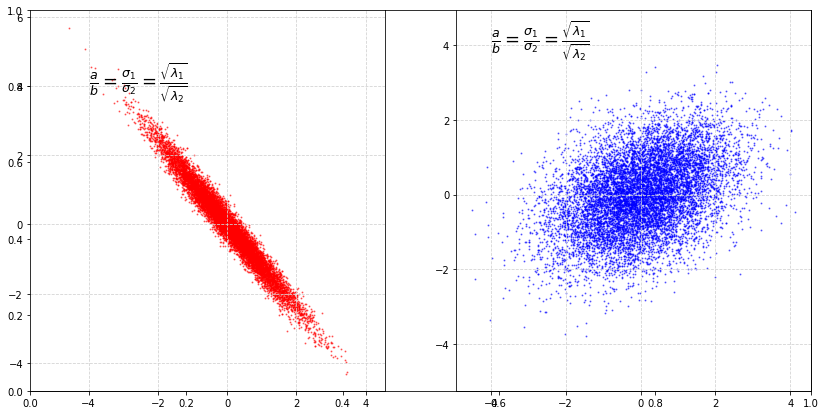

In [ ]:

######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
rho12 = -1.2
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], [rho12, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'r', alpha = .5)

string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)

###################
mu1, mu2 = 0, 0
rho12 = .5
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], [rho12, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'b', alpha = .5)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

It is clear that covariance decides the rotation angle.

The rotation matrix which is a linear transformation operator

$$
\left[
\begin{matrix}
\cos \theta & -\sin\theta\\
\sin \theta & \cos\theta
\end{matrix}
\right]
$$

the rotation matrix is closely connected with the covariance matrix.

Next we will plot circles with parametric functions, then transform them by the covariance matrix.

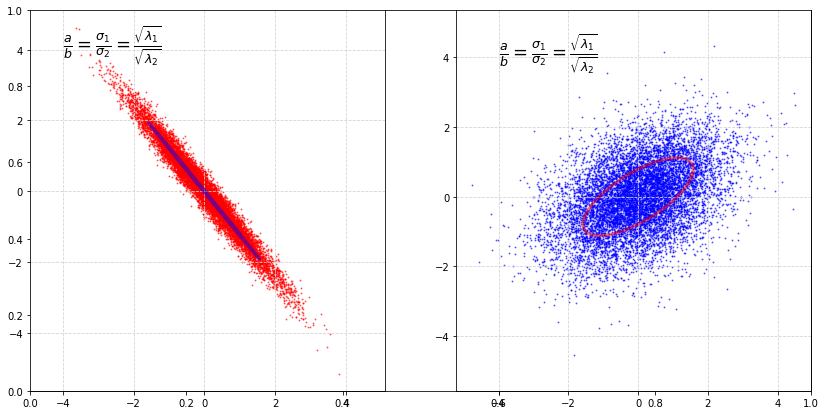

In [ ]:

######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
rho12 = -1.2
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], 
                  [rho12, sigma2]])

###############
a = 1
b = 1
t = np.arange(0, 2.1*np.pi, .1)
x = a * np.cos(t)
y = b * np.sin(t)

B = np.concatenate((x, y)).reshape(2,66)
C= Sigma@B
axs.plot(C[0,:], C[1,:], color = 'b', lw = 3, alpha = .5)
###################

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'r', alpha = .5)

string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)

###################
mu1, mu2 = 0, 0
rho12 = .5
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], 
                  [rho12, sigma2]])

############
a = 1
b = 1
x = a * np.cos(t)
y = b * np.sin(t)

B = np.concatenate((x, y)).reshape(2,66)
C= Sigma@B
axs.plot(C[0,:], C[1,:], color = 'r', lw = 3, alpha = .5)
###########

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'b', alpha = .5)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

We can see that covariance matrix functions like a rotation matrix.

# <font face="gotham" color="purple"> Quadratic Form of Normal Distribution

If a random normal vector $\mathbf{x} \sim N(\mathbf{\mu}, \Sigma)$, the linear transformation $A\mathbf{x}=\mathbf{z}$ is also normally distributed, but we would like to know more of $A\mathbf{x}$. Take expectation and variance respectively,

$$
E(\mathbf{z})= AE(\mathbf{x}) = AE(\mathbf{x})= A\mathbf{\mu}
$$

\begin{align}
\text{Var}(\mathbf{z})&= E[(\mathbf{z} - E(\mathbf{z}))(\mathbf{z}-E(\mathbf{z}))^T]\\
&= E[(A\mathbf{x} - A\mathbf{\mu}))(A\mathbf{x}-A\mathbf{\mu})^T]\\
& = AE[(\mathbf{x}-\mathbf{\mu})(\mathbf{x}-\mathbf{\mu})^T]A^T\\
& = A\Sigma A^T
\end{align}

where $A$ is a deterministic matrix.

If $\Sigma = \sigma^2 \mathbf{I}$, then $\text{Var}(\pmb{z})= \sigma^2AA^T$.